# Инициализация

In [39]:
import pandas as pd

In [40]:
# df1 = pd.read_csv("df0_cleaned.csv")
df1 = pd.read_csv("cbr.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [41]:
# df2 = pd.read_csv("df1_cleaned.csv")
df2 = pd.read_csv("smart_lab.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [42]:
# df3 = pd.read_csv("df2_cleaned.csv")
df3 = pd.read_csv("banki.csv") # датасет получен скрапингом, после очистки вместо него грузить очищенные данные

In [43]:
dfs = [df1,df2, df3]

In [44]:
df1.head(5)

,Unnamed: 0,url,title,text,date,url_preview
0,0,https://www.cbr.ru/press/event/?id=6349,Инфляционные ожидания в январе преимущественно...,В начале года ожидаемая населением инфляция сн...,2020-01-30T00:00:00,NaN
1,1,https://www.cbr.ru/press/event/?id=6350,Средневзвешенная ставка по ипотечным кредитам ...,Средневзвешенная процентная ставка по ипотечны...,2020-01-30T00:00:00,NaN
2,2,https://www.cbr.ru/press/event/?id=6352,Банк России одобрил более 100 инициатив рынка ...,Подведены первые итоги деятельности Рабочей гр...,2020-01-31T00:00:00,NaN
3,3,https://www.cbr.ru/press/event/?id=6355,Объявлен сбор заявок на Конкурс экономических ...,Банк России и научный журнал «Деньги и кредит»...,2020-02-06T00:00:00,NaN
4,4,https://www.cbr.ru/press/event/?id=6357,Банк России публикует план подготовки норматив...,В 2020 году Банк России намерен выпустить 35 н...,2020-02-07T00:00:00,NaN


In [64]:
df2.head(5)

,Unnamed: 0.1,Unnamed: 0,url,title,text,date,url_preview
0,0,0,https://smart-lab.ru/blog/566086.php,"АФК Система - выкупила 7,639 млн акции с 26.09...","афк «система» сообщает, что ао «система финанс...",2019-10-07T00:00:00,NaN
1,1,1,https://smart-lab.ru/blog/566081.php,НМТП - нормализованный грузооборот Группы за 8...,"группа нмтп сообщает, что нормализованный груз...",2019-10-07T00:00:00,NaN
2,2,2,https://smart-lab.ru/blog/566080.php,Русал - вложит 500 млн руб в оборудование для ...,"ок ""русал"" инвестирует порядка 500 миллионов р...",2019-10-07T00:00:00,NaN
3,3,3,https://smart-lab.ru/blog/566077.php,Роснефть фундаментально недооценена - Велес Ка...,в текущем году акции «роснефти» не пользуются ...,2019-10-07T00:00:00,NaN
4,4,4,https://smart-lab.ru/blog/566076.php,История с появлением на рынке базы персональны...,история с появлением на рынке базы персональны...,2019-10-07T00:00:00,NaN


In [8]:
corpus = df2["text"].to_list()
corpus

['АФК «Система» сообщает, что АО «Система Финанс» (подконтрольная АФК организация) приобрела 7 639 300 обыкновенных акций АФК после объявления о запуске программы выкупа акций 17 сентября 2019 г. \r\nАкции были приобретены на Московской бирже (ММВБ) уполномоченным «Система Финанс» брокером в период с 26 сентября 2019 г. по 2 октября 2019 г. и переданы «Система Финанс» 4 октября 2019 г.\n\r\nС начала запуска Программы «Система Финанс» приобрела 32 358 700 обыкновенных акций\n\nсообщение',
 'Группа НМТП сообщает, что нормализованный грузооборот Группы НМТП (с учетом продажи ООО «НЗТ») за 8 месяцев 2019 года вырос на 7,9% относительно аналогичного периода прошлого года.\xa0Основные драйверы\xa0Увеличение объемов перевалки сырой нефти (+23%) на фоне общего роста экспорта данного сырья из России.Рост объемов перевалки химических грузов (+22,4%) за счет увеличения отгрузок опасных минеральных удобрений в направлении стран Южной и Северной Америки, а также неопасных минеральных удобрений в на

# [+] Очистка текста

* ссылки
* unicode
* переносы

In [18]:
!pip install clean-text

     ------------------------------------ 175.4/175.4 kB 878.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.1/53.1 kB ? eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171032 sha256=ecfd0cd8e8b318e63cfead9d68724a9620a3dc97b4d1691fd9c2604616ea2c5f
  Stored in directory: c:\users\1pc\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [45]:
from cleantext import clean
from cleantext.sklearn import CleanTransformer

In [46]:
from tqdm.notebook import tqdm
def clean1(x):
    result = clean(x,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=False,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_phone_numbers=False,         # replace all phone numbers with a special token
        no_numbers=False,               # replace all numbers with a special token
        no_digits=False,                # replace all digits with a special token
        no_currency_symbols=False,      # replace all currency symbols with a special token
        no_punct=False,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="",
        replace_with_currency_symbol="",
        lang="ru"                       # set to 'de' for German special handling
    )
    return result
for idx, df_item in tqdm(enumerate(dfs)):
    df_item["text_clean"] = df_item["text"].apply(lambda x: clean1(x))
    df_item["title_clean"] = df_item["title"].apply(lambda x: clean1(x))
    df_item = df_item.dropna(subset=['title', 'text','title_clean','text_clean'])
    df_item.to_csv(f"df{idx}_cleaned.csv")

0it [00:00, ?it/s]

# Стемминг, лемматизация

In [ ]:
for idx, df_item in tqdm(enumerate(dfs)):
    # df_item["text_processed"] = df_item["text"].apply(lambda x: clean1(x))
    # df_item["title_processed"] = df_item["title"].apply(lambda x: clean1(x))
    # df_item = df_item.dropna(subset=['title', 'text','title_clean','text_clean'])
    df_item.to_csv(f"df{idx}_processed.csv")

# Инициализация после очистки

In [47]:
df0 = pd.read_csv("df0_cleaned.csv")
df1 = pd.read_csv("df1_cleaned.csv")
df2 = pd.read_csv("df2_cleaned.csv")
df2.head(5)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,url,title,text,date,url_preview,text_clean,title_clean
0,0,0,0,https://www.banki.ru/news/lenta/?id=10906999,Фондовые торги в России открылись в минусе,\n\n\nРоссийские фондовые индексы начали торго...,2019-09-26T10:03:00,https://static4.banki.ru/ugc/c0/56/66/f2/previ...,российские фондовые индексы начали торговую се...,фондовые торги в россии открылись в минусе
1,1,1,1,https://www.banki.ru/news/lenta/?id=10907000,Заубер Банк повысил ставки по двум вкладам,\n\n\nЗаубер Банк поднял ставки по двум депози...,2019-09-26T10:26:00,https://static3.banki.ru/ugc/90/40/ac/d5/previ...,заубер банк поднял ставки по двум депозитам.вк...,заубер банк повысил ставки по двум вкладам
2,2,2,2,https://www.banki.ru/news/lenta/?id=10907001,Рубль дешевеет в начале торгов,\n\n\nРубль дешевеет к доллару и евро в начале...,2019-09-26T10:29:00,https://static2.banki.ru/ugc/ac/57/be/68/previ...,рубль дешевеет к доллару и евро в начале валют...,рубль дешевеет в начале торгов
3,3,3,3,https://www.banki.ru/news/lenta/?id=10907002,БКС предложил посетителям Банки.ру инвестпроду...,\n\n\nБКС предлагает посетителям Банки.ру инве...,2019-09-26T09:56:00,https://static3.banki.ru/ugc/58/9a/af/a5/previ...,бкс предлагает посетителям банки.ру инвестиции...,бкс предложил посетителям банки.ру инвестпроду...
4,4,4,4,https://www.banki.ru/news/lenta/?id=10907004,​Средневзвешенный курс доллара на 11:30 мск вы...,\n\n\nСредневзвешенный курс доллара на единой ...,2019-09-26T11:35:00,https://static2.banki.ru/ugc/b0/93/dd/5a/previ...,средневзвешенный курс доллара на единой торгов...,​средневзвешенный курс доллара на 11:30 мск вы...


# ...

In [15]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 703.6 kB/s eta 0:00:00


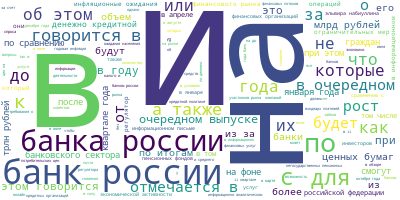

In [48]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df0['text_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Выделение тем 1

https://www.toptal.com/python/topic-modeling-python

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords

In [15]:
stopwords_list = stopwords.words('english') + stopwords.words('russian')

In [ ]:
count_vect = CountVectorizer(stop_words=stopwords_list, lowercase=True)
x_counts = count_vect.fit_transform(corpus)
x_counts.todense()